In [ ]:
# Author: BIRUNGI JOAN
# Date: 6-AUG-2025
# ------------------------------------------------------------------------------------------------------------------------------------------

# Tasks 1, 2, & 3
# Loan Eligibility Modeling Template (Decision Tree, SVM, Random Forest )
# ------------------------------------------------------------------------------------------------------------------------------------------

# Task 4
# Logic regression
# ------------------------------------------------------------------------------------------------------------------------------------------

# Task 5
# unsupervised learning - kmeans
# ------------------------------------------------------------------------------------------------------------------------------------------
# Description: Examination notebook to solve Tasks 1–3 for Dream Housing Finance with loan_data [Task 1-3] - loan_data.csv dataset and task 4 (irish dataset), task 5 with cust_seg[Task 5] - cust_seg.csv dataset
# ------------------------------------------------------------------------------------------------------------------------------------------

#Importing necessary libraries

In [ ]:
# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#loading data

In [ ]:
#Loading the datasets

# Display settings
pd.set_option('display.max_columns', None)

#Task 1-3 dataset
# Load data
df = pd.read_csv('/content/drive/MyDrive/loan_data [Task 1-3] - loan_data.csv')

#task 4 dataset

dff = pd.read_csv('/content/drive/MyDrive/airlines_flights_data.csv')


#task 5 dataset
df1= pd.read_csv('/content/drive/MyDrive/cust_seg[Task 5] - cust_seg.csv')

print("Shape:", df.shape)
df.head()

Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Imputation of Numeric Features with Median and categorical features [task 1-3 dataset]

> Add blockquote



In [ ]:
## Basic Data Cleaning
# Drop rows where `Loan_Status` is missing
# Map `Loan_Status` to binary labels
#Handle missing feature values (simple strategy: drop rows) – feel free to replace with imputation.
# Clean target
TARGET_col= 'Loan_Status'

# Drop rows where Loan_Status is missing
df = df.dropna(subset=[TARGET_col])
df = df.dropna()
# Map Loan_Status to binary values: Y -> 1, N -> 0
df[TARGET_col] = df[TARGET_col].map({'Y': 1, 'N': 0})

# dependats has data type object because of 3+ so we replace it with 3 and change it to float
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

# Drop rows with any remaining missing values
# (Replace with sophisticated imputation if desired)

#df = df.dropna()

print("After cleaning:", df.shape)

After cleaning: (480, 13)


In [ ]:
# Feature / target split
X = df.drop(columns=['Loan_ID', TARGET_col])
Y = df[TARGET_col]

In [ ]:
from sklearn.impute import SimpleImputer
# Identify column types
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


print("Categorical cols:", cat_cols)
print("Numeric cols:", num_cols)


Categorical cols: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
Numeric cols: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (384, 11) Test size: (96, 11)


In [ ]:
# Common preprocessing block (re‑usable for all models)
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols),
    ]
)


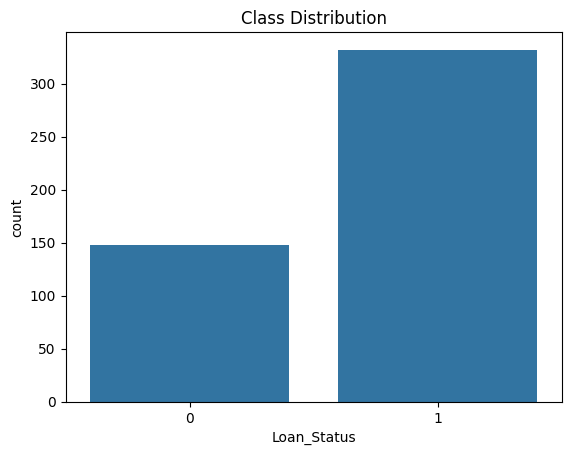

In [ ]:
sns.countplot(x=TARGET_col, data=df)
plt.title('Class Distribution')
plt.show()

Resampled train size: (532, 17)
Class distribution after SMOTE:
 Loan_Status
1    266
0    266
Name: count, dtype: int64


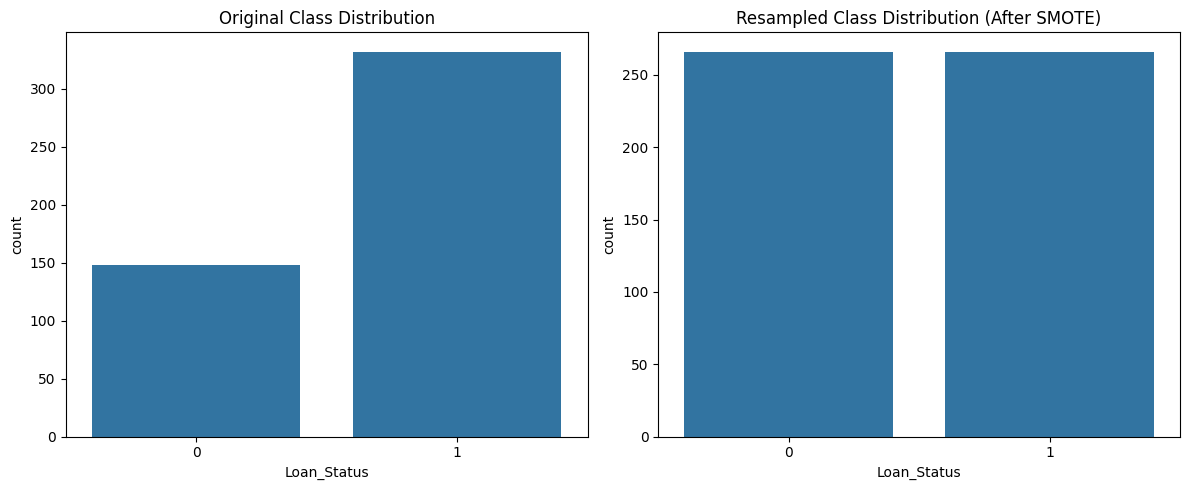

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt



# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

# Fit-transform the training data, transform test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

print("Resampled train size:", X_train_resampled.shape)
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

# Optional: visualize class distribution before and after
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=TARGET_col, data=df, ax=axs[0])
axs[0].set_title('Original Class Distribution')

sns.countplot(x=y_train_resampled, ax=axs[1])
axs[1].set_title('Resampled Class Distribution (After SMOTE)')

plt.tight_layout()
plt.show()


# Task 1 – Decision Trees with Hyperparameter Tuning

A **Decision Tree** is a supervised machine learning algorithm used for classification and regression tasks. It works by splitting the data into subsets based on feature values sort of like a flowchart or a series of "yes/no" questions.

**How It Works**

1. **Root Node:** Start with the full dataset and find the feature that best splits the data (based on a criterion like Gini impurity or entropy).

2. **Internal Nodes:** At each node, split the data again using the best feature at that level.

3. **Leaf Nodes:** Endpoints that represent a class label (in classification) or a value (in regression).

**Advantages**

*  Easy to understand and visualize.
*  No need for feature scaling.
*  Works for both classification and regression.


**Disadvantages**

*  Prone to overfitting if not controlled.
*  Can be unstable with small data changes.
*  May not perform as well as ensemble models like Random Forests.


















**metrics used**


*   **precision:** Of the predicted positive cases, how many were actually positive?

*   **recall:** Of all actual positive cases, how many were correctly predicted?

*   **f1-score:** Harmonic mean of precision and recall. It balances the two.
*   **support:** The number of actual instances of each class in the true labels (y_test).


* **accuracy:** Overall correctness of the model (percentage of all correct predictions).


* **macro avg:** Average of precision, recall, and F1 for each class, without considering class imbalance.



* **weighted avg:**Average of precision, recall, and F1 weighted by support (i.e., by how many instances each class has).

















Default Decision Tree – Classification Report
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        30
           1       0.83      0.74      0.78        66

    accuracy                           0.72        96
   macro avg       0.69      0.70      0.69        96
weighted avg       0.74      0.72      0.73        96



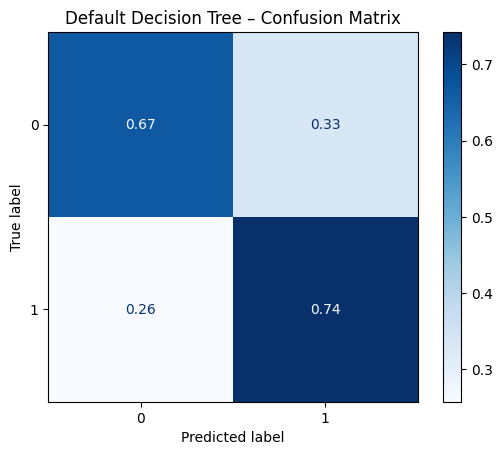

In [ ]:
# Task 1 – Decision Trees with Hyperparameter Tuning
## 1A. Default Decision Tree

# 1B Build pipeline with default DecisionTreeClassifier
pipe_dt_default = Pipeline([
    ("prep", preprocess),
    ("clf", DecisionTreeClassifier(random_state=42)),
])

# Fit model
pipe_dt_default.fit(X_train, y_train)

# Evaluate
print("Default Decision Tree – Classification Report")
print(classification_report(y_test, pipe_dt_default.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pipe_dt_default, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Default Decision Tree – Confusion Matrix")
plt.show()


AFTER CLASS BALANCING WITH SMOTE


Default Decision Tree – Classification Report (After SMOTE)
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        30
           1       0.82      0.68      0.74        66

    accuracy                           0.68        96
   macro avg       0.65      0.67      0.65        96
weighted avg       0.71      0.68      0.69        96



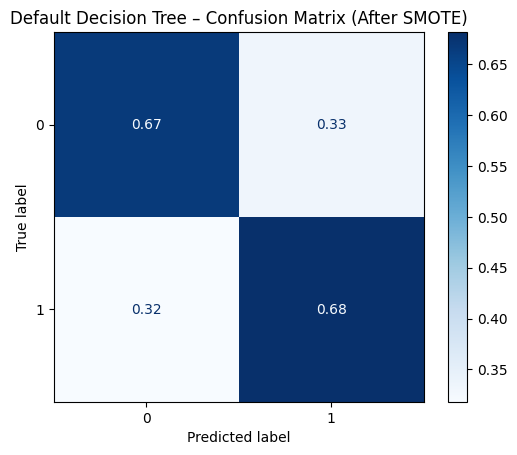

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#TASK 1B (AFTER SMOTE)

# 1B. Build and train a Decision Tree Classifier on resampled data (no pipeline needed here)
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit on the resampled (preprocessed) training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the preprocessed test data
y_pred = dt_clf.predict(X_test_preprocessed)

# Evaluate
print("Default Decision Tree – Classification Report (After SMOTE)")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')
plt.title("Default Decision Tree – Confusion Matrix (After SMOTE)")
plt.show()


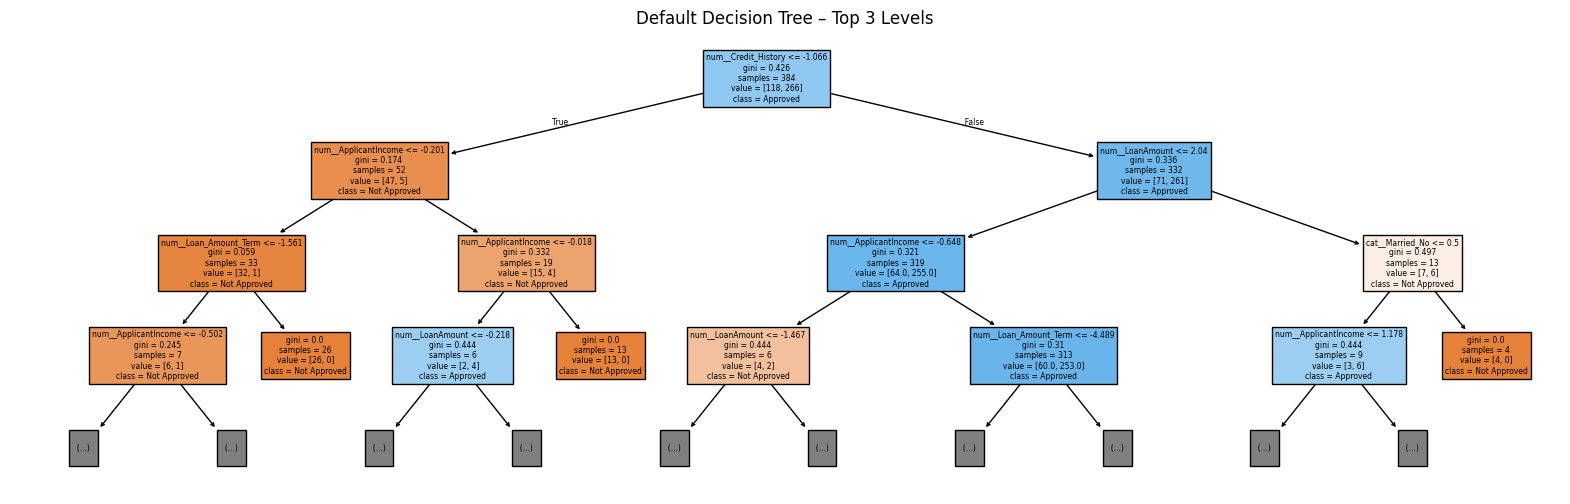

In [ ]:
# Visualize tree (use small max_depth for readability)
plt.figure(figsize=(20, 6))
plot_tree(
    pipe_dt_default.named_steps['clf'],
    feature_names=pipe_dt_default.named_steps['prep'].get_feature_names_out(),
    class_names=['Not Approved', 'Approved'],
    filled=True,
    max_depth=3,
)
plt.title("Default Decision Tree – Top 3 Levels")
plt.show()

 **TASK 1:(2)**

 **What is GridSearchCV in Machine Learning?**

GridSearchCV is a technique in scikit-learn used to find the best combination of hyperparameters for a machine learning model by systematically trying all possible combinations from a grid of parameters, using cross-validation.

**Why use GridSearchCV?**

Machine learning models (e.g., Decision Trees, SVMs, Random Forests) have hyperparameters — values that are set before training (unlike weights learned from data). The right combination of hyperparameters can significantly improve model performance.

GridSearchCV automates this tuning process.

**How does it work?**

You define a model (e.g., DecisionTreeClassifier()).

You specify a grid of hyperparameters (e.g., max_depth, criterion, min_samples_split).

**GridSearchCV:**

Trains the model on every combination of hyperparameters using cross-validation.

Evaluates each combination using a chosen scoring metric (like recall_macro, accuracy, f1_macro, etc.).

Selects the best combination based on the evaluation score.

 **Common Parameters of GridSearchCV**


 | Parameter    | Description                                                              |
| ------------ | ------------------------------------------------------------------------ |
| estimator  | The model you want to tune (e.g., DecisionTreeClassifier()).           |
| param_grid | Dictionary with hyperparameter names and list of values to try.          |
| cv        | Cross-validation folds (e.g., cv=5 means 5-fold CV).                   |
| scoring    | Metric to optimize (e.g., accuracy, f1_macro, recall_macro). |
| n_jobs=-1  | Use all CPU cores for parallel processing.                               |
| verbose    | Shows progress messages (higher values show more).                       |

**Benefits of GridSearchCV**

1.  Automates hyperparameter tuning
2.  Uses cross-validation for robust evaluation
3. Finds the best performing model configuration

**Limitations**

 Computationally expensive: Tries all combinations → time-consuming for large grids

 May overfit on small datasets if not careful with CV settings

In [ ]:
## 1B. Hyperparameter Tuning with GridSearchCV
#Parameters tuned: `max_depth`, `min_samples_split`, `criterion`.
#Scoring metric: **recall_macro** (more sensitive to minority class).

param_grid = {
    'clf__max_depth': [None, 3, 5, 7, 10, 20],
    'clf__min_samples_split': [2, 5, 10, 20, 30],
    'clf__criterion': ['gini', 'entropy'],
}

pipe_dt = Pipeline([
    ("prep", preprocess),
    ("clf", DecisionTreeClassifier(random_state=42)),
])

gs = GridSearchCV(
    estimator=pipe_dt,
    param_grid=param_grid,
    cv=5,
    scoring="recall_macro",
    n_jobs=-1,
    verbose=1,
)

gs.fit(X_train, y_train)

print("Best recall_macro:", gs.best_score_)
print("Best params:", gs.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best recall_macro: 0.6904756479202747
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 20}


Tuned Decision Tree – Classification Report
              precision    recall  f1-score   support

           0       0.68      0.63      0.66        30
           1       0.84      0.86      0.85        66

    accuracy                           0.79        96
   macro avg       0.76      0.75      0.75        96
weighted avg       0.79      0.79      0.79        96



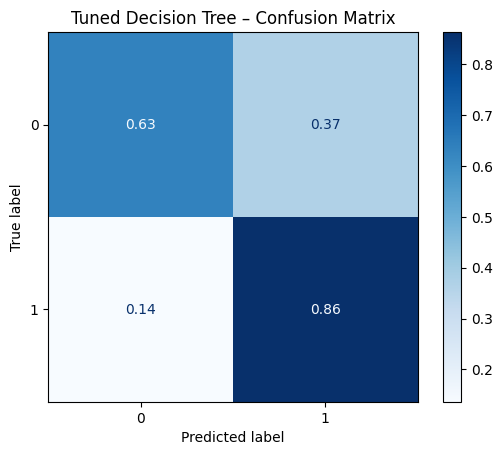

Best hyperparameters: Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num', StandardScaler(),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
      

In [ ]:
# Evaluate tuned model
best_dt = gs.best_estimator_

# Print classification report
print("Tuned Decision Tree – Classification Report")
print(classification_report(y_test, best_dt.predict(X_test)))

# Normalized Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Tuned Decision Tree – Confusion Matrix")
plt.show()
print("Best hyperparameters:", best_dt)

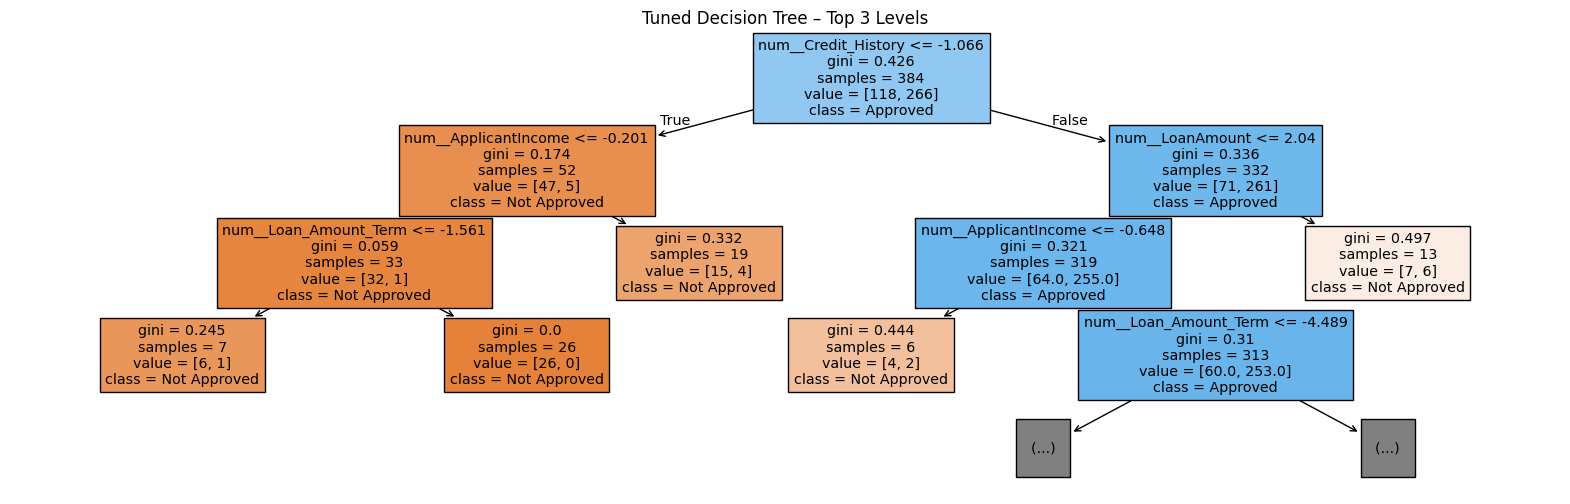

In [ ]:
# Visualize tuned tree (first 3 levels for brevity)
plt.figure(figsize=(20, 6))
plot_tree(
    best_dt.named_steps['clf'],
    feature_names=best_dt.named_steps['prep'].get_feature_names_out(),
    class_names=['Not Approved', 'Approved'],
    filled=True,
    max_depth=3,
)
plt.title("Tuned Decision Tree – Top 3 Levels")
plt.show()

**Performance Comparison: Default vs. Tuned Decision Tree**

In [ ]:
#TASK 1(4)
#Performance Comparison: Default vs. Tuned Decision Tree
# Metrics from classification reports
default_metrics = {
    'Class 0': {'Precision': 0.54, 'Recall': 0.67, 'F1-score': 0.60},
    'Class 1': {'Precision': 0.83, 'Recall': 0.74, 'F1-score': 0.78},
    'Macro Avg': {'Precision': 0.69, 'Recall': 0.70, 'F1-score': 0.69},
    'Accuracy': 0.72
}

tuned_metrics = {
    'Class 0': {'Precision': 0.68, 'Recall': 0.63, 'F1-score': 0.66},
    'Class 1': {'Precision': 0.84, 'Recall': 0.86, 'F1-score': 0.85},
    'Macro Avg': {'Precision': 0.76, 'Recall': 0.75, 'F1-score': 0.75},
    'Accuracy': 0.79
}

# Convert to DataFrame
comparison_df = pd.DataFrame({
    'Default Model': {
        'Precision (Class 0)': default_metrics['Class 0']['Precision'],
        'Recall (Class 0)': default_metrics['Class 0']['Recall'],
        'F1-score (Class 0)': default_metrics['Class 0']['F1-score'],
        'Precision (Class 1)': default_metrics['Class 1']['Precision'],
        'Recall (Class 1)': default_metrics['Class 1']['Recall'],
        'F1-score (Class 1)': default_metrics['Class 1']['F1-score'],
        'Precision (Macro Avg)': default_metrics['Macro Avg']['Precision'],
        'Recall (Macro Avg)': default_metrics['Macro Avg']['Recall'],
        'F1-score (Macro Avg)': default_metrics['Macro Avg']['F1-score'],
        'Accuracy': default_metrics['Accuracy']
    },
    'Tuned Model': {
        'Precision (Class 0)': tuned_metrics['Class 0']['Precision'],
        'Recall (Class 0)': tuned_metrics['Class 0']['Recall'],
        'F1-score (Class 0)': tuned_metrics['Class 0']['F1-score'],
        'Precision (Class 1)': tuned_metrics['Class 1']['Precision'],
        'Recall (Class 1)': tuned_metrics['Class 1']['Recall'],
        'F1-score (Class 1)': tuned_metrics['Class 1']['F1-score'],
        'Precision (Macro Avg)': tuned_metrics['Macro Avg']['Precision'],
        'Recall (Macro Avg)': tuned_metrics['Macro Avg']['Recall'],
        'F1-score (Macro Avg)': tuned_metrics['Macro Avg']['F1-score'],
        'Accuracy': tuned_metrics['Accuracy']
    }
})

# Display
import pandas as pd
from IPython.display import display

print(" Performance Comparison: Default vs. Tuned Decision Tree")
display(comparison_df.round(2))


 Performance Comparison: Default vs. Tuned Decision Tree


,Default Model,Tuned Model
Precision (Class 0),0.54,0.68
Recall (Class 0),0.67,0.63
F1-score (Class 0),0.60,0.66
Precision (Class 1),0.83,0.84
Recall (Class 1),0.74,0.86
F1-score (Class 1),0.78,0.85
Precision (Macro Avg),0.69,0.76
Recall (Macro Avg),0.70,0.75
F1-score (Macro Avg),0.69,0.75
Accuracy,0.72,0.79


In [ ]:
print("Best hyperparameters:", best_dt)

Best hyperparameters: Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area']),
                                                 ('num', StandardScaler(),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
      

#  Task 2 – Support Vector Machine (SVM)

**TASK 2 (1)**

 **What is SVM?**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and sometimes regression.

At its core, SVM finds the best boundary (called a hyperplane) that separates data points of different classes with the maximum margin — i.e., the boundary that is as far away as possible from both classes.

SVM creates a hyperplane that separates classes with maximum margin.

Supports linear and non-linear (via kernel trick).

**Pros of SVM:**

*   High accuracy, robust with small data.
*   Effective in high-dimensional spaces.
*   Works well for margin-based classification.
*   Robust to overfitting (especially with proper regularization).

*   Can model non-linear boundaries via kernel trick.
*   Few support vectors needed, so memory efficient.


**Cons of SVM:**

* Computationally heavy, not great with noisy or large datasets.
* Computationally intensive with large datasets (especially non-linear).



* Choice of kernel and parameters matters a lot (sensitive to tuning).
* No probabilistic output by default (unlike logistic regression).


* Hard to interpret compared to decision trees or linear models.
* Not ideal for datasets with too much noise (misclassified outliers).



**Core Concepts in SVM**

**Concept and explanation**                                                                          

1.  **Hyperplane:** The decision boundary between classes.                                

2. **Support Vectors:** The data points closest to the hyperplane.                             

3. **Margin:** Distance between support vectors and the hyperplane.                   

4. **Kernel:** A mathematical function used to transform data into higher dimensions.

5. **C (Regularization):** Controls tradeoff between margin size and misclassification.           

6. **Gamma (in RBF kernel):** Controls how far influence of a single training example reaches.       


SVM – Classification Report
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.84      0.95      0.89        66

    accuracy                           0.84        96
   macro avg       0.85      0.78      0.80        96
weighted avg       0.85      0.84      0.83        96



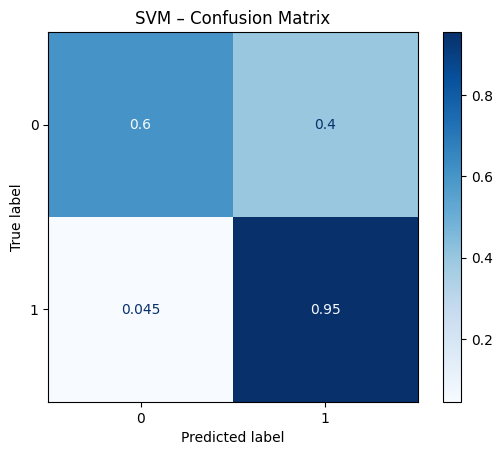

In [ ]:
# Task 2 – Support Vector Machine (SVM)
## 2A. Theory
# SVM finds the maximum‑margin hyperplane.
# Kernel trick enables non‑linear boundaries.
# Pros: works in high‑dim space, robust.
# Cons: sensitive to scaling, costly on large data.



#TASK 2(2B)
# Pipeline with SVM (RBF kernel by default)
pipe_svm = Pipeline([
    ("prep", preprocess),
    ("clf", SVC(kernel='rbf', probability=False, random_state=42)),
])

pipe_svm.fit(X_train, y_train)
print("SVM – Classification Report")

#TASK 2(3)
print(classification_report(y_test, pipe_svm.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test, normalize='true', cmap='Blues')
plt.title("SVM – Confusion Matrix")
plt.show()

**DESCRIPTION OF RESULTS**

Interpreting the metrics, commenting on scaling importance, comparison to Decision Tree.

**Class 1** (majority class): Very high recall (0.95) → the model is excellent at detecting actual positives (true positives).

**Class 0** (minority class): Recall is only 0.60, meaning some false negatives remain.

**Macro Avg Recall:** 0.78 → balanced view across classes.

**Accuracy:** 0.84 → higher than the Decision Tree (0.79).


 **Scaling Importance for SVM**

SVM is sensitive to feature scaling:


* It uses distances between data points to create a hyperplane, so unscaled features can bias the result.
* Always use StandardScaler or MinMaxScaler in your preprocessing pipeline when using SVM.






**Default SVM  (After SMOTE)**

Default SVM – Classification Report (After SMOTE)
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        30
           1       0.82      0.68      0.74        66

    accuracy                           0.68        96
   macro avg       0.65      0.67      0.65        96
weighted avg       0.71      0.68      0.69        96



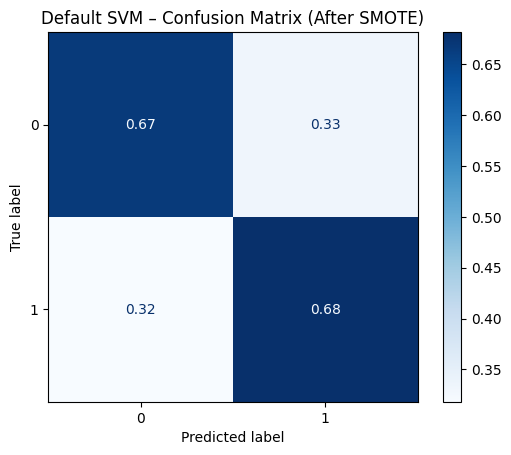

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# (AFTER SMOTE)


svm_clf = SVC(kernel='rbf', probability=False, random_state=42)

# Fit on the resampled (preprocessed) training data
svm_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the preprocessed test data
y_pred = dt_clf.predict(X_test_preprocessed)

# Evaluate
print("Default SVM – Classification Report (After SMOTE)")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')
plt.title("Default SVM – Confusion Matrix (After SMOTE)")
plt.show()

**Performance Comparison: SVM vs. Tuned Decision Tree**

In [ ]:

from IPython.display import display
# Performance Comparison: SVM vs. Tuned Decision Tree
# Tuned Decision Tree metrics (from earlier)
tree_metrics = {
    'Class 0': {'Precision': 0.68, 'Recall': 0.63, 'F1-score': 0.66},
    'Class 1': {'Precision': 0.84, 'Recall': 0.86, 'F1-score': 0.85},
    'Macro Avg': {'Precision': 0.76, 'Recall': 0.75, 'F1-score': 0.75},
    'Accuracy': 0.79
}

# SVM metrics
svm_metrics = {
    'Class 0': {'Precision': 0.86, 'Recall': 0.60, 'F1-score': 0.71},
    'Class 1': {'Precision': 0.84, 'Recall': 0.95, 'F1-score': 0.89},
    'Macro Avg': {'Precision': 0.85, 'Recall': 0.78, 'F1-score': 0.80},
    'Accuracy': 0.84
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Tuned Decision Tree': {
        'Precision (Class 0)': tree_metrics['Class 0']['Precision'],
        'Recall (Class 0)': tree_metrics['Class 0']['Recall'],
        'F1-score (Class 0)': tree_metrics['Class 0']['F1-score'],
        'Precision (Class 1)': tree_metrics['Class 1']['Precision'],
        'Recall (Class 1)': tree_metrics['Class 1']['Recall'],
        'F1-score (Class 1)': tree_metrics['Class 1']['F1-score'],
        'Macro Precision': tree_metrics['Macro Avg']['Precision'],
        'Macro Recall': tree_metrics['Macro Avg']['Recall'],
        'Macro F1': tree_metrics['Macro Avg']['F1-score'],
        'Accuracy': tree_metrics['Accuracy']
    },
    'SVM': {
        'Precision (Class 0)': svm_metrics['Class 0']['Precision'],
        'Recall (Class 0)': svm_metrics['Class 0']['Recall'],
        'F1-score (Class 0)': svm_metrics['Class 0']['F1-score'],
        'Precision (Class 1)': svm_metrics['Class 1']['Precision'],
        'Recall (Class 1)': svm_metrics['Class 1']['Recall'],
        'F1-score (Class 1)': svm_metrics['Class 1']['F1-score'],
        'Macro Precision': svm_metrics['Macro Avg']['Precision'],
        'Macro Recall': svm_metrics['Macro Avg']['Recall'],
        'Macro F1': svm_metrics['Macro Avg']['F1-score'],
        'Accuracy': svm_metrics['Accuracy']
    }
})

# Display comparison
print("Performance Comparison: SVM vs. Tuned Decision Tree")
display(comparison_df.round(2))


Performance Comparison: SVM vs. Tuned Decision Tree


,Tuned Decision Tree,SVM
Precision (Class 0),0.68,0.86
Recall (Class 0),0.63,0.60
F1-score (Class 0),0.66,0.71
Precision (Class 1),0.84,0.84
Recall (Class 1),0.86,0.95
F1-score (Class 1),0.85,0.89
Macro Precision,0.76,0.85
Macro Recall,0.75,0.78
Macro F1,0.75,0.80
Accuracy,0.79,0.84


**Analysis Summary**


*  **SVM outperforms Decision Tree** in overall accuracy (0.84 vs. 0.79) and macro metrics.
* **Recall for Class 1 (positive class)** is significantly higher in SVM (0.95 vs. 0.86).


* **Tree slightly better at Class 0 recall (0.63 vs. 0.60)**, but precision is better in SVM.
* SVM likely **benefits from scaling** and handles margins better than a tree's hard splits.











# Task 3 – Random Forest

**TASK 3 (1)**

**What Is a Random Forest?**
A Random Forest is an ensemble learning method that builds a "forest" of decision trees and combines their outputs to make more accurate and stable predictions.

It is based on two core ideas:

1. Bagging (Bootstrap Aggregation)

2. Random feature selection at each split

**How Random Forest Works (Step-by-Step)**

 **Bootstrap Sampling**

*   From the training dataset, draw multiple random samples with replacement (i.e., bootstrapping).

*  Each sample is used to train one decision tree.
*  Each tree sees a different version of the data → adds variance.


**Train Decision Trees**

*   On each bootstrap sample, grow a decision tree without pruning (i.e., fully grown).
*   At each split in the tree, select a random subset of features, and choose the best feature from that subset.

*  This adds randomness and decorrelates the trees


**Aggregate Predictions**

*  For classification: Take a majority vote across trees.
*  For regression: Take the average of predictions from all trees.

**Why Random Forest Works**
Random Forest reduces:


*  Overfitting (by averaging many noisy trees)

* Variance (because multiple diverse trees are used)
* Bias-variance tradeoff is improved


**Advantages of Random Forest**


* High Accuracy: Generally more accurate than a single decision tree due to ensembling

* Robust to Overfitting: Bootstrapping and random feature selection make the model less sensitive to noise

* Handles Missing Values: Can still perform well even with missing data

* Works with High Dimensional Data: Can handle many input features effectively

* Feature Importance: Can be used to rank feature importance for interpretability

* No Need for Feature Scaling: Works well without normalization or standardization

* Handles Both Tasks: Works for classification and regression

**Disadvantages of Random Forest**

* Less Interpretability: Hard to understand compared to a single decision tree (not a white-box model)

* Slower Predictions: Large number of trees = slower inference time

* Memory Intensive: Many trees and deep structures consume more RAM

* Can Still Overfit: Especially on very noisy datasets or if number of trees is too small

* Not Ideal for Sparse Data:Like text classification with bag-of-words unless tuned carefully

**When to Use Random Forest**

* When you need high accuracy and can sacrifice interpretability
* When your data has many features, interactions, or nonlinear relationships
* When you're unsure which features matter most (feature importance helps)
* When other models (like a single Decision Tree) overfit the data


Random Forest – Classification Report
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.85      0.86      0.86        66

    accuracy                           0.80        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.80      0.80      0.80        96



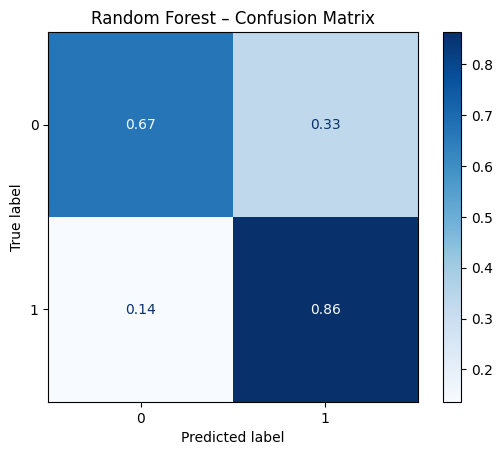

In [ ]:
## 3A. Theory
# Ensemble of bootstrap‑sampled decision trees.
#Random feature subset per split → decorrelated trees.
# Pros: strong performance, handles non‑linearities, provides feature importance.
# Cons: less interpretable, larger memory footprint.

#TASK 3(2A,2B)
pipe_rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=500, random_state=42)),
])

pipe_rf.fit(X_train, y_train)

#TASK 3 (3)
print("Random Forest – Classification Report")
print(classification_report(y_test, pipe_rf.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test, normalize='true', cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.show()

**DESCRIPTION OF RESULTS**

1.**Class-by-class interpretation**


* **Class 0**

  **Precision = 0.69** → When the model predicts “0”, it’s correct 69% of the time.

  **Recall = 0.67**→ It correctly identifies 67% of all actual “0” cases.

  **F1-score = 0.68** → Balanced measure shows moderate performance for this class.

  **Interpretation** → The model sometimes misclassifies Class 0, likely predicting them as Class 1.
*  ** Class 1**

  **Precision = 0.85** → When predicting “1”, it’s correct 85% of the time.

  **Recall = 0.86** → It captures 86% of all actual “1” cases.

 **F1-score = 0.86** → Strong, consistent performance for this class.

  **Interpretation** → The model is much better at identifying Class 1 than Class 0.

2.**Overall metrics**


* Accuracy = 0.80 (80%) → Out of all 96 predictions, 80% were correct.
*   Macro Average
  * Precision, recall, and F1-score are 0.77 each → This average treats both classes equally, regardless of size, showing balanced (but slightly weaker) performance due to Class 0’s lower scores.

*  Weighted Average
  * All ≈ 0.80 → This average accounts for class size (Class 1 has more samples), so the model’s overall score is closer to Class 1’s stronger performance.



3.**What it means**

*  The model is more reliable for Class 1 than Class 0.
* Class imbalance exists (66 samples of Class 1 vs. 30 samples of Class 0), which can bias the model toward predicting Class 1 more often.
*  If both classes are equally important, improving recall for Class 0 should be a priority (e.g., using SMOTE, adjusting class weights, or collecting more Class 0 samples).











**Commenting on Scaling Importance**

Random Forest does not require feature scaling (e.g., StandardScaler or MinMaxScaler).

This is because trees split on feature thresholds rather than computing distances the model is invariant to the scale of input features.

This gives Random Forest an advantage when preprocessing effort needs to be minimized.


**Default Random Forest (After SMOTE)**

Default Decision Tree – Classification Report (After SMOTE)
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        30
           1       0.83      0.82      0.82        66

    accuracy                           0.76        96
   macro avg       0.72      0.73      0.72        96
weighted avg       0.76      0.76      0.76        96



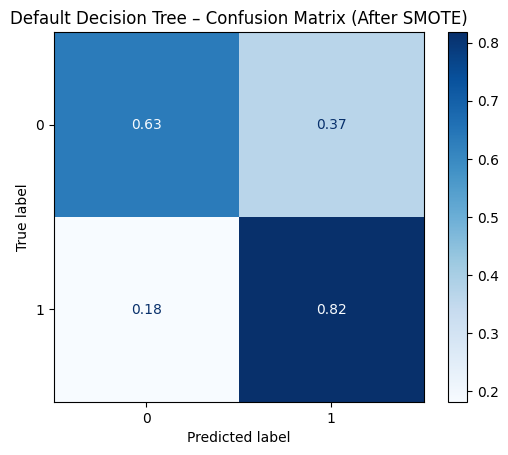

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#TASK 1B (AFTER SMOTE)

# 1B. Build and train a Decision Tree Classifier on resampled data (no pipeline needed here)
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit on the resampled (preprocessed) training data
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the preprocessed test data
y_pred = rf_clf.predict(X_test_preprocessed)

# Evaluate
print("Default Random Forest – Classification Report (After SMOTE)")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')
plt.title("Default Random Forest – Confusion Matrix (After SMOTE)")
plt.show()

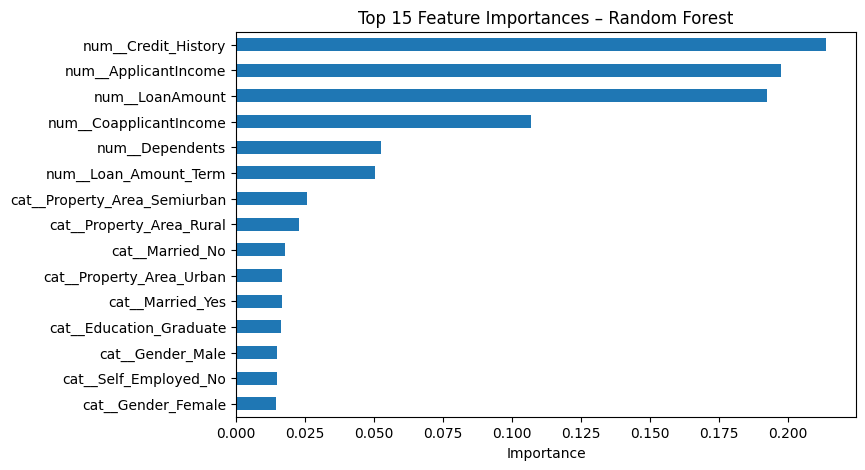

In [ ]:
# Highlight feature importances:

importances = pipe_rf.named_steps['clf'].feature_importances_
feature_names = pipe_rf.named_steps['prep'].get_feature_names_out()
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]
plt.figure(figsize=(8, 5))
fi.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances – Random Forest")
plt.xlabel("Importance")
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

#COMPARISON OF Random Forest metrics AND SVM metrics


# Random Forest metrics
rf_metrics = {
    'Class 0': {'Precision': 0.69, 'Recall': 0.67, 'F1-score': 0.68},
    'Class 1': {'Precision': 0.85, 'Recall': 0.86, 'F1-score': 0.86},
    'Macro Avg': {'Precision': 0.77, 'Recall': 0.77, 'F1-score': 0.77},
    'Accuracy': 0.80
}

# SVM metrics
svm_metrics = {
    'Class 0': {'Precision': 0.86, 'Recall': 0.60, 'F1-score': 0.71},
    'Class 1': {'Precision': 0.84, 'Recall': 0.95, 'F1-score': 0.89},
    'Macro Avg': {'Precision': 0.85, 'Recall': 0.78, 'F1-score': 0.80},
    'Accuracy': 0.84
}

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Random Forest': {
        'Precision (Class 0)': rf_metrics['Class 0']['Precision'],
        'Recall (Class 0)': rf_metrics['Class 0']['Recall'],
        'F1-score (Class 0)': rf_metrics['Class 0']['F1-score'],
        'Precision (Class 1)': rf_metrics['Class 1']['Precision'],
        'Recall (Class 1)': rf_metrics['Class 1']['Recall'],
        'F1-score (Class 1)': rf_metrics['Class 1']['F1-score'],
        'Macro Precision': rf_metrics['Macro Avg']['Precision'],
        'Macro Recall': rf_metrics['Macro Avg']['Recall'],
        'Macro F1': rf_metrics['Macro Avg']['F1-score'],
        'Accuracy': rf_metrics['Accuracy']
    },
    'SVM': {
        'Precision (Class 0)': svm_metrics['Class 0']['Precision'],
        'Recall (Class 0)': svm_metrics['Class 0']['Recall'],
        'F1-score (Class 0)': svm_metrics['Class 0']['F1-score'],
        'Precision (Class 1)': svm_metrics['Class 1']['Precision'],
        'Recall (Class 1)': svm_metrics['Class 1']['Recall'],
        'F1-score (Class 1)': svm_metrics['Class 1']['F1-score'],
        'Macro Precision': svm_metrics['Macro Avg']['Precision'],
        'Macro Recall': svm_metrics['Macro Avg']['Recall'],
        'Macro F1': svm_metrics['Macro Avg']['F1-score'],
        'Accuracy': svm_metrics['Accuracy']
    }
})

# Display the comparison table
print(" Performance Comparison: Random Forest vs. SVM")
display(comparison_df.round(2))


 Performance Comparison: Random Forest vs. SVM


,Random Forest,SVM
Precision (Class 0),0.69,0.86
Recall (Class 0),0.67,0.60
F1-score (Class 0),0.68,0.71
Precision (Class 1),0.85,0.84
Recall (Class 1),0.86,0.95
F1-score (Class 1),0.86,0.89
Macro Precision,0.77,0.85
Macro Recall,0.77,0.78
Macro F1,0.77,0.80
Accuracy,0.80,0.84


**comparison Conclusion:**

Random Forest gives solid performance with no need for feature scaling, and offers feature importance, making it good for explainability.

However, SVM achieves better accuracy.

COMPARISON OF DECISION TREE, SVM AND RANDOM FOREST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Metrics: fill in with your actual values
decision_tree = {
    'Class 0': {'Precision': 0.68, 'Recall': 0.63, 'F1-score': 0.66},
    'Class 1': {'Precision': 0.84, 'Recall': 0.86, 'F1-score': 0.85},
    'Macro Avg': {'Precision': 0.76, 'Recall': 0.75, 'F1-score': 0.75},
    'Accuracy': 0.79
}

random_forest = {
    'Class 0': {'Precision': 0.69, 'Recall': 0.67, 'F1-score': 0.68},
    'Class 1': {'Precision': 0.85, 'Recall': 0.86, 'F1-score': 0.86},
    'Macro Avg': {'Precision': 0.77, 'Recall': 0.77, 'F1-score': 0.77},
    'Accuracy': 0.80


}

svm = {
    'Class 0': {'Precision': 0.86, 'Recall': 0.60, 'F1-score': 0.71},
    'Class 1': {'Precision': 0.84, 'Recall': 0.95, 'F1-score': 0.89},
    'Macro Avg': {'Precision': 0.85, 'Recall': 0.78, 'F1-score': 0.80},
    'Accuracy': 0.84
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Decision Tree': {
        'Precision (Class 0)': decision_tree['Class 0']['Precision'],
        'Recall (Class 0)': decision_tree['Class 0']['Recall'],
        'F1-score (Class 0)': decision_tree['Class 0']['F1-score'],
        'Precision (Class 1)': decision_tree['Class 1']['Precision'],
        'Recall (Class 1)': decision_tree['Class 1']['Recall'],
        'F1-score (Class 1)': decision_tree['Class 1']['F1-score'],
        'Macro Precision': decision_tree['Macro Avg']['Precision'],
        'Macro Recall': decision_tree['Macro Avg']['Recall'],
        'Macro F1': decision_tree['Macro Avg']['F1-score'],
        'Accuracy': decision_tree['Accuracy']
    },
    'Random Forest': {
        'Precision (Class 0)': random_forest['Class 0']['Precision'],
        'Recall (Class 0)': random_forest['Class 0']['Recall'],
        'F1-score (Class 0)': random_forest['Class 0']['F1-score'],
        'Precision (Class 1)': random_forest['Class 1']['Precision'],
        'Recall (Class 1)': random_forest['Class 1']['Recall'],
        'F1-score (Class 1)': random_forest['Class 1']['F1-score'],
        'Macro Precision': random_forest['Macro Avg']['Precision'],
        'Macro Recall': random_forest['Macro Avg']['Recall'],
        'Macro F1': random_forest['Macro Avg']['F1-score'],
        'Accuracy': random_forest['Accuracy']
    },
    'SVM': {
        'Precision (Class 0)': svm['Class 0']['Precision'],
        'Recall (Class 0)': svm['Class 0']['Recall'],
        'F1-score (Class 0)': svm['Class 0']['F1-score'],
        'Precision (Class 1)': svm['Class 1']['Precision'],
        'Recall (Class 1)': svm['Class 1']['Recall'],
        'F1-score (Class 1)': svm['Class 1']['F1-score'],
        'Macro Precision': svm['Macro Avg']['Precision'],
        'Macro Recall': svm['Macro Avg']['Recall'],
        'Macro F1': svm['Macro Avg']['F1-score'],
        'Accuracy': svm['Accuracy']
    }
})

# Show the comparison table
print(" Performance Comparison: Decision Tree vs. Random Forest vs. SVM")
display(comparison_df.round(2))


 Performance Comparison: Decision Tree vs. Random Forest vs. SVM


,Decision Tree,Random Forest,SVM
Precision (Class 0),0.68,0.69,0.86
Recall (Class 0),0.63,0.67,0.60
F1-score (Class 0),0.66,0.68,0.71
Precision (Class 1),0.84,0.85,0.84
Recall (Class 1),0.86,0.86,0.95
F1-score (Class 1),0.85,0.86,0.89
Macro Precision,0.76,0.77,0.85
Macro Recall,0.75,0.77,0.78
Macro F1,0.75,0.77,0.80
Accuracy,0.79,0.80,0.84


**Decision Tree vs. Random Forest vs. SVM  Macro Metrics & Accuracy**

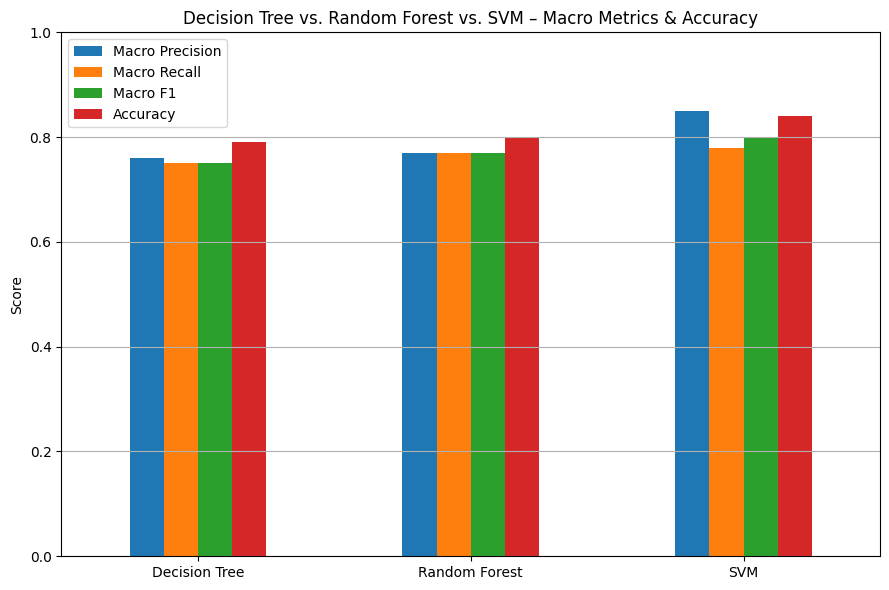

In [ ]:
# Plot macro metrics and accuracy
plot_df = comparison_df.loc[['Macro Precision', 'Macro Recall', 'Macro F1', 'Accuracy']]
plot_df.T.plot(kind='bar', figsize=(9, 6))
plt.title("Decision Tree vs. Random Forest vs. SVM – Macro Metrics & Accuracy")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Finally**

**Decision Tree:** Accuracy: 0.79


**Random Forest:** Accuracy: 0.80 (better than Decision Tree)


**SVM:** Accuracy: 0.84 (best among the three)



#Task 4 - Logistic regression

**TASK 4 PART A**

**Dataset:** airlines_flights_data.csv

**Source:** kaggle

**Features:** airline, source_city, departure_time, stops, arrival_time,destination_city, class, duration, days_left,
       

**Target:** price

**Problem Definition**

The goal is to to predict the price_category (e.g., Low, Medium, High) of a flight ticket based on airline, flight details, duration, stops, days left, etc.

**type of machine lerning**

supervised learning - classification

**Justification**

although the prices are numeric, they are discrete and can often be grouped into categories (low, medium and high). for real world usability predicting a class label is more practiccal

stratify=y in train_test_split ensures that the class distribution in the target variable (y) is preserved in both the training and test sets.
In other words, the proportion of each class in y will be the same in both y_train and y_test. it is important because class distribution could be uneven

In [ ]:
dff.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [ ]:
dff.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
#  Drop irrelevant columns
dff.drop(columns=['index', 'flight'], inplace=True)
dff.shape

(300153, 10)

In [ ]:

# Create price categories (e.g., Low, Medium, High)
dff['price'] = pd.qcut(dff['price'], q=3, labels=['Low', 'Medium', 'High'])
# Define target and features
X = dff.drop(columns='price')   # Features
y = dff['price']                # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# Now stratified split works correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

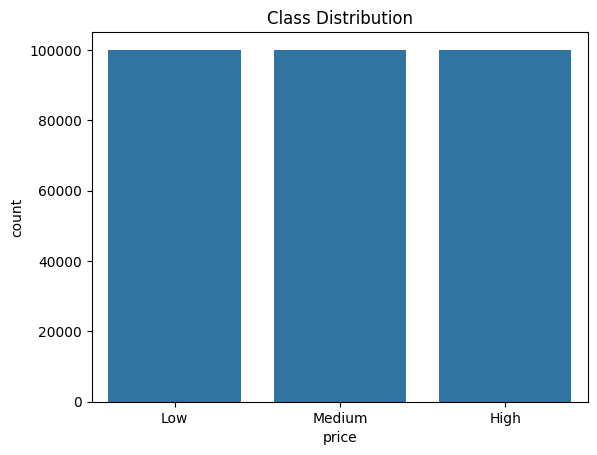

In [ ]:
sns.countplot(x=dff['price'], data=dff)
plt.title('Class Distribution')
plt.show()

Default Logistic Regression Results (Target: price):
              precision    recall  f1-score   support

        High       1.00      0.94      0.97     25012
         Low       0.75      0.74      0.75     25015
      Medium       0.70      0.75      0.73     25012

    accuracy                           0.81     75039
   macro avg       0.82      0.81      0.81     75039
weighted avg       0.82      0.81      0.81     75039



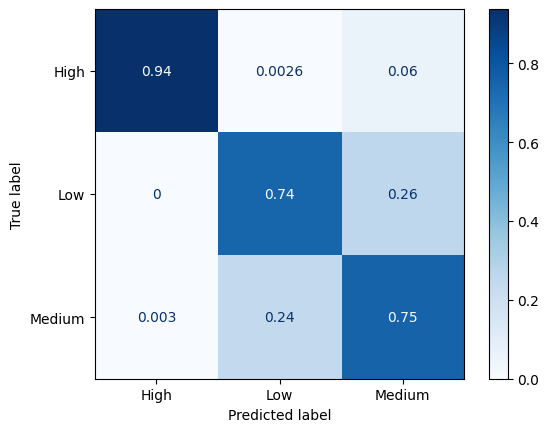

In [ ]:
# Identify column types
categorical = X.select_dtypes(include='object').columns
numerical = X.select_dtypes(include='number').columns

# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical),
    ("num", StandardScaler(), numerical)
])

# Default Logistic Regression pipeline
default_model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train and predict
default_model.fit(X_train, y_train)
y_pred = default_model.predict(X_test)

# Evaluation
print("Default Logistic Regression Results (Target: price):")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Blues", normalize='true')


**Part B: Tuned Logistic Regression with GridSearchCV**

because of the size of the dataset, 'clf__C': [ 0.01, 0.1, 1] was used to reduce on run time

 elasticnet was making the grid slow so was removed.

In [ ]:
# ----- Part B: Tuned Logistic Regression with GridSearchCV -----
param_grid = {
    'clf__solver': ['liblinear'],
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [ 0.01, 0.1, 1],
    'clf__class_weight': [None, 'balanced']
}
# Sample down the training set to 10,000 rows to speed up grid search
from sklearn.model_selection import train_test_split

#X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=10000, stratify=y_train, random_state=42)

# Pipeline for tuning
tuned_model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

grid = GridSearchCV(tuned_model, param_grid, cv=3, scoring='recall_macro', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best Parameters:
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}



Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

        High       1.00      0.93      0.96     25012
         Low       0.74      0.76      0.75     25015
      Medium       0.71      0.74      0.72     25012

    accuracy                           0.81     75039
   macro avg       0.82      0.81      0.81     75039
weighted avg       0.82      0.81      0.81     75039



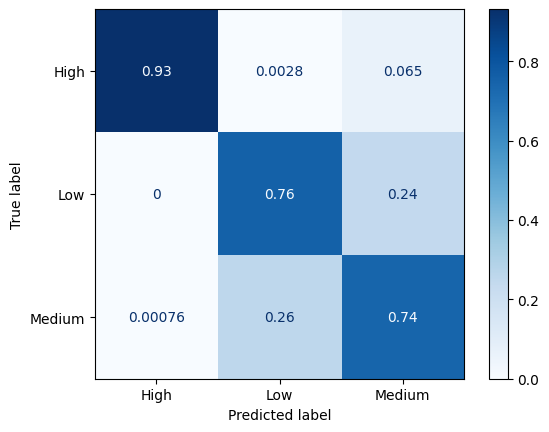

In [ ]:
# Evaluate tuned model
y_pred_tuned = grid.predict(X_test)
print("\nClassification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tuned, cmap="Blues", normalize='true')


🔹 Model Performance Comparison (Default vs Tuned Logistic Regression)
              precision_Default  recall_Default  f1-score_Default  \
High                   0.996854        0.937470          0.966250   
Low                    0.750363        0.743434          0.746882   
Medium                 0.703812        0.752239          0.727220   
accuracy               0.811045        0.811045          0.811045   
macro avg              0.817010        0.811048          0.813451   
weighted avg           0.817007        0.811045          0.813448   

              support_Default  precision_Tuned  recall_Tuned  f1-score_Tuned  \
High             25012.000000         0.999186      0.931953        0.964399   
Low              25015.000000         0.744053      0.756546        0.750248   
Medium           25012.000000         0.706147      0.741804        0.723536   
accuracy             0.811045         0.810099      0.810099        0.810099   
macro avg        75039.000000         0.81646

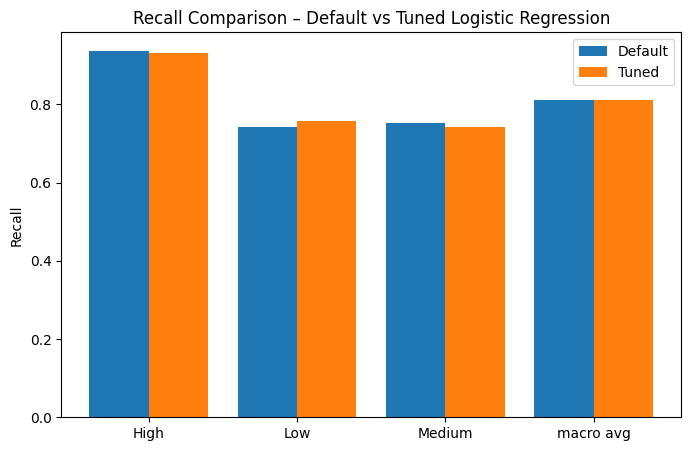

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Classification reports as dict
report_default = classification_report(y_test, y_pred, output_dict=True)
report_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)

# Convert to DataFrame
df_default = pd.DataFrame(report_default).transpose()
df_tuned = pd.DataFrame(report_tuned).transpose()

# Combine reports into one table for comparison
comparison = pd.concat([
    df_default.add_suffix('_Default'),
    df_tuned.add_suffix('_Tuned')
], axis=1)

print("\n🔹 Model Performance Comparison (Default vs Tuned Logistic Regression)")
print(comparison)

# -----------------------------------
# Plot Recall for Each Class
# -----------------------------------
classes = ["High", "Low", "Medium", "macro avg"]
recall_default = [report_default[c]["recall"] for c in classes]
recall_tuned = [report_tuned[c]["recall"] for c in classes]

x = range(len(classes))
plt.figure(figsize=(8,5))
plt.bar(x, recall_default, width=0.4, label="Default", align='center')
plt.bar([i + 0.4 for i in x], recall_tuned, width=0.4, label="Tuned", align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylabel("Recall")
plt.title("Recall Comparison – Default vs Tuned Logistic Regression")
plt.legend()
plt.show()


**Summary**


1.  **Overall Accuracy:**

Both models have the same accuracy (0.81), so tuning didn’t improve the raw percentage of correct predictions.
2.   **Key Differences:**



*   The tuned model slightly improved recall for Low class (0.74 → 0.76).
*   Slight drop in High recall (0.94 → 0.93).
*   Minor shifts in Medium recall (0.75 → 0.74).

Since we optimized for recall_macro, these small changes are expected — tuning often helps one class but slightly lowers another.




In [ ]:
#Which combination of hyperparameters led to the best-tuned model?
print("\nBest Parameters:")
print(grid.best_params_)


Best Parameters:
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


**TASK 4 D(i)(ii)**

i) **Best Parameters combination that led to the best-tuned model**




{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}

ii) **Two Insights Based on Data**

1. **Fewer Days Left → Higher Price (Advance Booking Advantage)**

As the departure date nears, ticket prices increase. This variable (days_left) is a strong driver of price.


2. **Business-Class or Multi-Stop Flights Often Fall into High Price**

Flights with multiple stops or premium airlines tend to be more expensive, which correlates well with the high price label.

3. **Flight Class Impact:**

Business-class tickets consistently fall in the “High” price category, while economy tickets dominate “Low” and “Medium.”

#Task 5 - Unsupervised learning

Your stakeholder is a credit card company (dataset attached) that wants to market new credit
cards. They have asked you to segment their potential customers to determine how and what
kind of cards they should market to each group

**Inspect Data**

In [ ]:
# Inspect
print("Shape:", df.shape)
df1.head(10)

Shape: (480, 13)


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,9,10,47,3,23,115,0.653,3.947,0.0,4.0


**Data Preprocessing**

Removed irrelevant columns (drop Unnamed and Customer Id) not useful for clustering.

Handled missing values (e.g., filled nulls in Defaulted) either fill with 0 or drop those rows.

Standardized features using StandardScaler.

In [ ]:
df1.isna().sum()

,0
Unnamed: 0,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
DebtIncomeRatio,0


In [ ]:
# Drop unnecessary columns
df1.drop(['Unnamed: 0', 'Customer Id'], axis=1, inplace=True)

# Handle missing values
df1['Defaulted'].fillna(0, inplace=True)  # or df.dropna(inplace=True)

# Standardize numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Save for reuse
df1_scaled = pd.DataFrame(scaled_data, columns=df1.columns)


/tmp/ipython-input-3543850260.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Defaulted'].fillna(0, inplace=True)  # or df.dropna(inplace=True)


In [ ]:
#check for mising values again
df1.isna().sum()

,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
DebtIncomeRatio,0


**TASK 5 - QUESTION 1**

1. Use K Means to create various customer segments

K-Means Customer Segmentation
**bold text**
**Objective**:To segment customers into meaningful groups using K-Means clustering, so the credit card company can tailor their marketing strategy and product offerings for each type of customer.

**K-Means Clustering**

Determine Optimal Cluster number using Elbow Method and Silhouette Score.



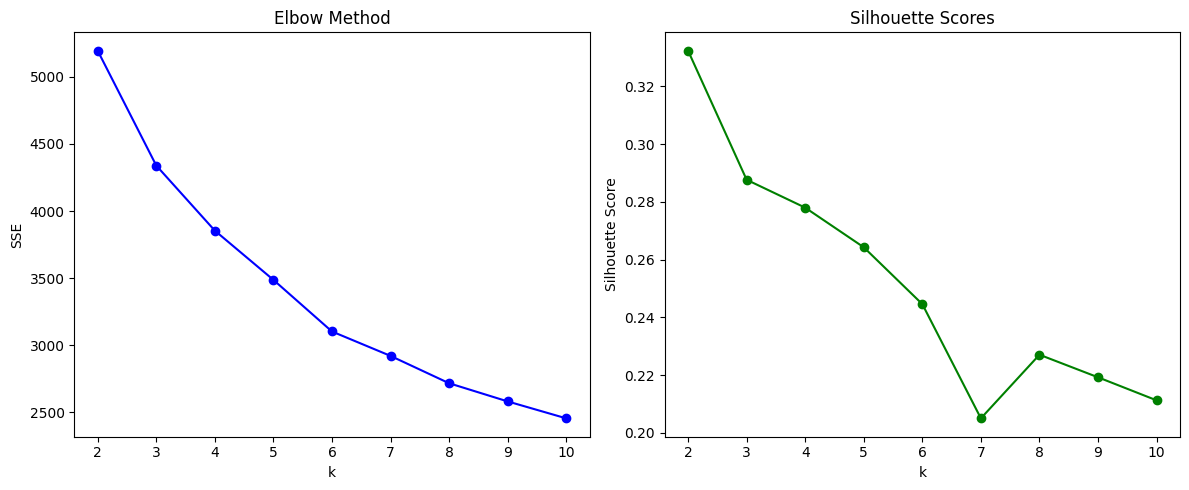

In [ ]:
# Elbow plot
sse = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df1_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

# Elbow
plt.subplot(1,2,1)
plt.plot(K, sse, 'bo-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Silhouette
plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.tight_layout()
plt.show()


In [ ]:
#Fit KMeans with Optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df1['KMeans_Cluster'] = kmeans.fit_predict(df1_scaled)

**TASK 5- QUESTION 2**

2. Create analytical visualizations that explore statistics for each feature for each cluster

**Visualization and Cluster Profiling**

Use PCA to reduce dimensionality and visualize clusters in 2D space.

Plot clusters to inspect separation and cohesion.

Calculat mean values of features per cluster.

Analyze and interpreted customer traits in each segment.

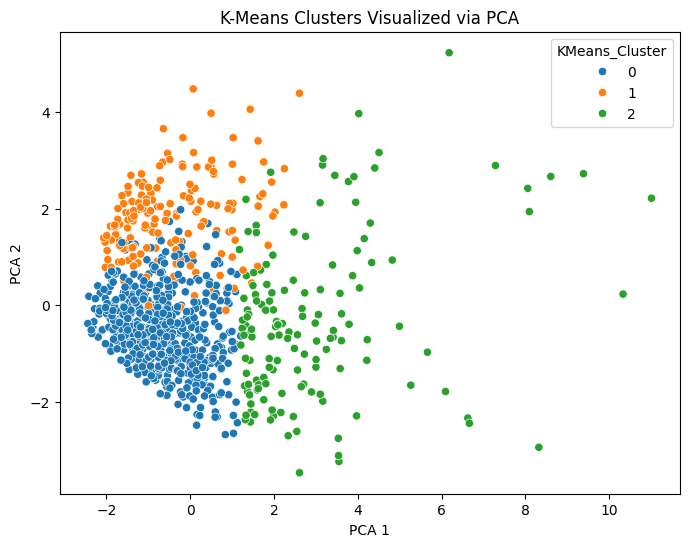

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(df1_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df1['KMeans_Cluster'], palette='tab10')
plt.title('K-Means Clusters Visualized via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**Cluster Descriptions Based on K-Means (PCA Visualization)**

The PCA scatterplot shows three clusters (0, 1, and 2), each representing distinct customer segments.

The color of the dot = its assigned K-Means cluster (0, 1, 2).

The axes are principal components (PCA 1 and PCA 2) they capture the most significant variation in the data.


**🔵 Cluster 0  Low Income, Low Debt, Possibly Younger Customers**

**Features:**

* Moderate age range
* Low income
* Low card and other debt
* Low debt-to-income ratio
* Few defaults


**Insight:**

These individuals appear cautious with credit use. They likely have smaller lines of credit, are early in their careers, or prefer conservative financial habits.

**Profile:**

Young professionals or conservative spenders, possibly with a lower credit limit.

**🟠 Cluster 1  High Debt, High Risk, Defaulters**

**Features:**

* Mid to low income
* High card debt and other debt
* Highest debt-to-income ratios
* Most defaults


**Insight:**

This group is financially strained, with a significant portion having defaulted on previous debts. They are over-leveraged and may present higher credit risk.


**Profile:**

Financially overextended individuals; likely struggling with repayment capacity.


**🟢 Cluster 2 – High Income, High Credit Utilization**

**Features:**

* High income
* Moderate to high card and other debt
* Mid-level debt-to-income ratios
* Almost no defaults


**Insight:**

These are responsible high earners who use their credit actively but manage repayments well. Despite higher balances, they rarely default.


**Profile:**

Prime credit customers with good financial stability and high purchasing power.

**Marketing Recommendations by Cluster**

**🔵 Cluster 0**

Recommendation:

* Offer low-limit starter credit cards or secured cards.
* Promote credit education programs or cashback on essentials to build trust and loyalty.
* Incentivize credit building features (e.g., free credit score monitoring).


**🟠 Cluster 1**

Recommendation:

* Avoid offering high-limit cards.
* Introduce debt consolidation offers or financial counseling services.
* Use targeted messaging emphasizing budget control tools and payment flexibility.

**🟢 Cluster 2**

Recommendation:

* Offer premium rewards cards, travel benefits, or high-tier perks.
* Provide customized offers (e.g., balance transfer bonuses, concierge services).
* Emphasize loyalty programs and long-term customer value.





**Interpretation of the K-Means Clustering Plot (via PCA)**

This plot shows the result of applying K-Means Clustering to a dataset, then projecting the high-dimensional data onto 2D using PCA (Principal Component Analysis) for visualization.

**What the Plot Shows**
1. **X-axis (PCA 1)** and **Y-axis (PCA 2)**: These are the first two principal components, capturing the most variance in the data.

2. **Points (dots)**: Represent individual data samples.

**Colors:**

  Blue (Cluster 0)

  Orange (Cluster 1)

  Green (Cluster 2)
  These are the three clusters (K=3) formed by K-Means.

**Observations**
Three distinct groupings are visible, showing that K-Means has separated the data reasonably well in PCA-reduced space.

Some overlap exists between clusters 0 (blue) and 1 (orange), suggesting that they may share similarities or the boundary between them is not very sharp.

Cluster 2 (green) appears more spread out and distinct, especially extending far along PCA 1 — this might indicate it captures outliers or a broader range of variation.

**Cluster Feature Analysis**

In [ ]:
#2. Create analytical visualizations that explore statistics for each feature for each cluster.


# Average stats per cluster
cluster_summary = df1.groupby('KMeans_Cluster').mean()
cluster_summary.style.background_gradient(cmap='Blues')


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
KMeans_Cluster,,,,,,,,
0,33.827458,1.604824,7.654917,36.181818,0.863681,1.822410,0.000000,7.993506
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,43.089655,1.931034,17.220690,102.724138,4.227897,8.018490,0.131034,13.891724


**TASK 5 - QUESTION 3-4**
3. Write a description of each cluster based on the visualizations that you created. Do more
than describe the numbers; try to see past the numbers and describe what kinds of
people are represented by each cluster. Include at least one insight for each cluster.
4. Create one or two recommendations for your stakeholders (the credit card company)
regarding how they should market credit cards differently or which cards they should
market to each cluster based on your data and insights.


**Cluster Summary and Visual Insights**

**🔵 Cluster 0 Young & Credit-Conscious Starters**

**Demographics:**

*  Average Age: ~34
*  Education Level: Low (1.6)
*  Employment: ~7.6 years
*  Income: Moderate (~36k)

**Credit Behavior:**

*  Lowest card and other debt
*  Zero defaults
*  Lowest debt-to-income ratio (~8%)


**Personal:**

  This group appears to be early-career individuals who are responsible with their finances. They likely maintain low balances, pay on time, and avoid overextending.

**Insight:**

This is a low-risk customer base with strong repayment potential and room to grow with the right financial products.

**Recommendations:**

Offer starter or growth cards (low APR, credit builder)

Consider incentives for spending on essentials, travel, or cash-back to build loyalty.

**🟠 Cluster 1  Financially Stressed, High Risk**

**Demographics:**

*  Average Age: ~32
*  Education: Moderate (~1.86)
*  Employment: Only ~4 years
*  Income: ~31.8k

**Credit Behavior:**

*  Highest default rate (~99%)
*  High card debt (1.57) and other debt (2.84)
* Highest debt-to-income ratio (~14%)

**Persona:**

These individuals may be financially unstable or over-leveraged. They show the classic signs of credit risk: low income, short employment, and very high default rate.

**Insight:**

These customers are at risk of default and likely in need of credit rehabilitation or support services.

**Recommendations:**

*  Avoid traditional credit offers.
*  Consider secured credit cards with credit counseling.
*  Promote debt management tools or consolidation offers.
*  Track with strict risk thresholds if lending.

**🟢 Cluster 2 Wealthy, Active Credit User**

**Demographics:**

*  Oldest group (~43 years)
*  Longest time employed (~17 years)
*  High income (~103k)

**Credit Behavior:**

*  Highest card debt (4.2) and other debt (8.0)
* Mid-level default rate (~13%)
* Debt-to-income ratio still moderate (~13.9%)


**Persona:**

These are established professionals or high earners who actively use credit. While they carry large balances, they have the income to manage it.

**Insight:**

This group is valuable. They represent prime customers who can afford premium offerings and are likely to generate strong revenue through credit activity.

**Recommendations:**

*  Market premium cards (travel, rewards, concierge services)
* Offer high limits and personalized credit experiences
*  Engage with retention and loyalty strategies.


**FINALLY**

1. cluster 0 Starters

  **Key Insight:**Responsible but low credit history

  **Recommended Product Strategy:**Starter cards, credit builder incentives

2. cluster 1 Risky

  **Key Insight:**High default, low income
  
  **Recommended Product Strategy:**Secured credit cards, debt support programs

3. cluster 2 Wealthy Users

  **Key Insight:**High income, high spenders
  
  **Recommended Product Strategy:**Premium cards, loyalty & rewards, large limits

  **CONCLUSION**

Using K-Means, we have successfully identified 3 distinct customer segments, each with unique financial behaviors. These clusters offer actionable insights that enable the credit card company to:

1. Personalize marketing campaigns and Reduce risk (targeting low-default groups),

2. Promote credit responsibly and Enhance customer retention by offering suitable card types and features

**TASK 5 - QUESTION 5**

5. Generate another set of segments using hierarchical clustering.


**Hierarchical Clustering - Visualizing with a Dendrogram**

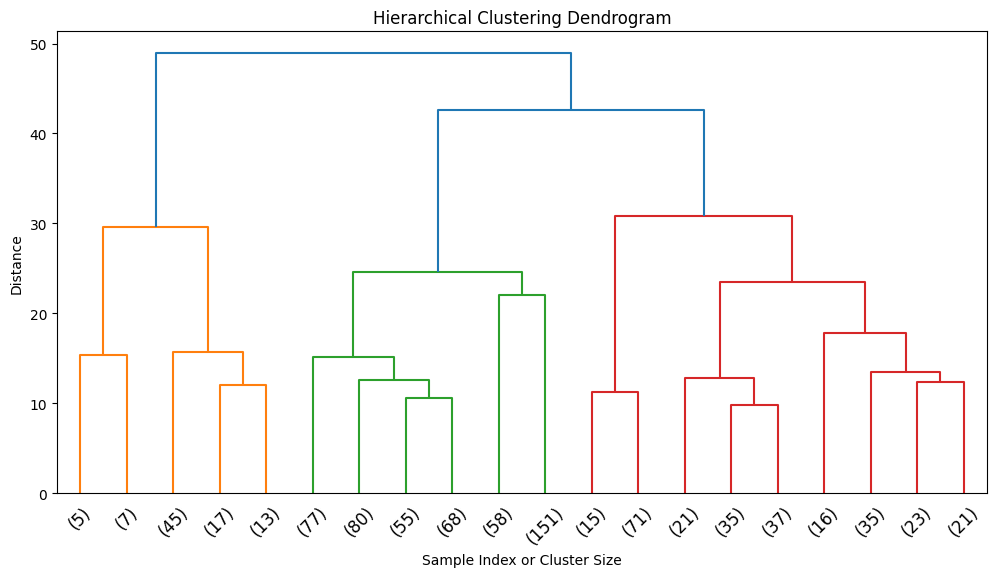

In [ ]:
# Linkage Matrix
linked = linkage(df1_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

**Dendrogram Interpretation**

**Overall Structure**

The x-axis shows sample indices or cluster sizes (e.g., (5), (7), (45), etc.). Each leaf is a single observation or a small cluster.

The y-axis shows distance (i.e., dissimilarity or linkage distance) at which clusters are merged.

Colors (orange, green, red) indicate different clusters formed at a certain level of the hierarchy.


**Key Observations**
1. Three Main Clusters:

The dendrogram shows three major colored branches (orange, green, red), which likely represent three distinct clusters.

You could draw a horizontal line at around distance = 30–35 to form these three clusters. This would cut across three vertical lines before a big merge happens — a sign of strong grouping.

2. Merge Height (Distance):

The highest merge happens just below distance = 50, where two large clusters combine.

This big jump in height implies that merging these clusters results in high dissimilarity — a good reason not to merge them if you're aiming for well-separated groups.

3. Cluster Characteristics:

**Orange cluster (left):** Contains elements like (5), (7), (45), etc., that merged at relatively low distances — likely quite similar to one another.

**Green cluster (middle):** Shows tight groupings (e.g., (68), (55), (80)) with merges happening at low distances likely compact and similar data points.

**Red cluster (right):** Slightly more spread out with merges occurring at moderate distances — still valid as one cluster, but possibly more internal variability.


**Conclusion**

The dendrogram suggests a natural division into 3 clusters, based on the large vertical jumps and clear color splits.

Comparing with the summary table (clusters 0, 1, 2), it confirms that 3 is a meaningful number of clusters for this data.

Ward's method worked well to group similar data points while minimizing internal variance.

**Agglomerative Clustering (e.g. 3 Clusters)**

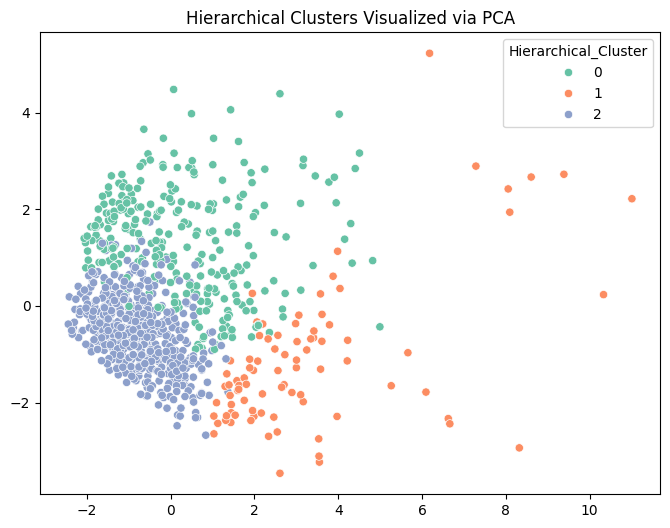

In [ ]:
# No affinity needed when linkage='ward'
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit to scaled data
df1['Hierarchical_Cluster'] = hc.fit_predict(df1_scaled)


#hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
#df1['Hierarchical_Cluster'] = hc.fit_predict(df1_scaled)

# Plot in PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df1['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clusters Visualized via PCA')
plt.show()

**General Interpretation**

Each dot represents one observation (data point).

The color of each dot corresponds to a hierarchical cluster (Cluster 0, 1, or 2).

The two axes are principal components (linear combinations of the original features), which capture most of the variation in the data.

**Cluster Insights**

**Cluster 0 (Green)**

Positioned more centrally and toward the upper middle.

Somewhat spread out, but not as much as Cluster 0.

Matches Cluster 1’s profile of higher income and longer employment a stable but diverse group.


**Cluster 1 (Orange)**

Located mostly on the right-hand side of the plot, stretching far along the first principal component (PC1).

These points are more spread out, indicating greater variance in this cluster.

 Cluster 0 had high default rates and higher debt burdens, possibly explaining why they deviate more.






**Cluster 2 (Blue/Purple)**

Tightly packed cluster in the bottom-left quadrant.

Very little spread compared to the others indicates high homogeneity.

Matches Cluster 2's profile: low income, low debt, no defaults financially cautious and consistent.

**Conclusions**

Separation: The clusters are well separated, particularly Cluster 0 vs. Cluster 2  strong indication that hierarchical clustering found meaningful groupings.

**Shape and Density:**

**Cluster 2** is compact and dense.

**Cluster 0** is scattered likely contains more outliers or high variance.

**Cluster 1** is in between: somewhat variable but not extreme.

**Finally**

This PCA visualization supports the earlier dendrogram and statistical interpretation:

Clusters are visibly distinct.

The clusters show different shapes and spreads, aligning with differences in income, employment, and debt behavior.

This gives confidence that the hierarchical clustering is valid and meaningful for segmenting your data.

**Comparison of K-Means Clusters Visualized via PCA to Hierarchical Clustering**



K-Means seems to produce more compact, spherical clusters, consistent with how the algorithm works (minimizing intra-cluster distance).

In [ ]:
# Average stats per cluster
df1.groupby('Hierarchical_Cluster').mean().style.background_gradient(cmap='BuGn')


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,KMeans_Cluster
Hierarchical_Cluster,,,,,,,,,
0,33.781022,1.835766,6.967153,41.405109,2.300350,4.187318,0.642336,15.490511,1.036496
1,45.172414,1.816092,20.482759,125.678161,3.944782,7.973839,0.080460,10.241379,1.908046
2,33.924335,1.621677,7.341513,35.572597,0.750112,1.586724,0.000000,7.178937,0.012270


**TASK 5 - QUESTION 6**

6. Visualize and describe these clusters.

**Cluster Descriptions (Based on Summary Table)**


**Cluster 0**

 Younger, moderate income, higher debt, higher default rate

Age: ~33 (Relatively young group.)

Income: ~$41.4k (Moderate income.)

Debt: ~2.30k (Moderate credit card debt.) and ~4.19k (Higher other debts.)

Defaulted: 64.2% (Very high default rate.)

Debt/Income Ratio: 15.49% (Fairly high debt burden.)

**Interpretation:**

This group is young, not highly educated, has moderate income and debt, but a very high default rate, suggesting financial instability.

**Product:**

Starter credit cards with low credit lines and educational perks.

**Cluster 1**

 Older, high income, higher employment, low default

Age: ~47.17 (older individuals)

Income: ~125.68k (High)

Debt: ~3.94k (High card debt.) and ~	7.97k (Higher other debts.)

Defaulted: 	~8.0% (low)

Debt/Income Ratio: ~10.24% (Manageable debt given high income.)

**Interpretation:**

This group is older, well-employed, financially stable despite having the highest debts in absolute terms due to strong income. Low default risk.

**Product:**

Premium travel cards, high-limit business cards, loyalty perks.

**Cluster 2**

 Younger, low income, low debt, no defaults

Age: ~33 (Similar in age to Cluster 0.)

Income: ~35.57k (Lowest income among clusters)

Debt: ~0.75k (low card debt.) and ~1.59k (low other debts.)

Defaulted: 	~0.0% (no default)

Debt/Income Ratio: ~7.18% (Very low debt burden.)

**Interpretation:**

This group is young, low-income, but very conservative with debt, and has no defaults. Financially cautious.

**Product:**

Balance transfer or low-APR cards.

**Conclusion on Hierarchical Clustering**

Hierarchical clustering revealed 3 interpretable customer groups.

These align partially with the 3 K-Means clusters, but may merge some segments (e.g., debt-heavy customers grouped together).

Hierarchical clustering is easier to visualize, but less scalable on large datasets than K-Means.

